## Pymaceuticals Inc.

Analysis:
- Ramicane and Capomulin are the most effective drug regimens. This is supported by their resulting tumor volumes, both the mean value (line 6) and the whisker plots (line 13).
- Tumor volume increases with weight, as supported by the correlation coefficient and line of regression (line 16). 
- Of the treatments where outliers were measured, only one was present, signifying the data is consistent (line 12).


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = study_results.merge(mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
mouse_count = len(pd.unique(df['Mouse ID']))
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupe = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dupe

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop(df[df['Mouse ID'] == 'g989'].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(pd.unique(clean_df['Mouse ID']))
clean_mouse_count

248

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
sorted_df = clean_df.groupby('Drug Regimen')
sort_mean = sorted_df['Tumor Volume (mm3)'].mean()
sort_med = sorted_df['Tumor Volume (mm3)'].median()
sort_var = sorted_df['Tumor Volume (mm3)'].var()
sort_std = sorted_df['Tumor Volume (mm3)'].std()
sort_sem = sorted_df.sem()['Tumor Volume (mm3)']

sum_stat_reg = pd.DataFrame({'Mean Tumor Volume':sort_mean, 'Median Tumor Volume':sort_med, 'Tumor Volume Variance':sort_var, \
                            'Tumor Volume Std. Dev.':sort_std, 'Tumor Volume Std. Err.':sort_sem})
sum_stat_reg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0.5, 1.0, 'Timepoints per Drug Regimen')

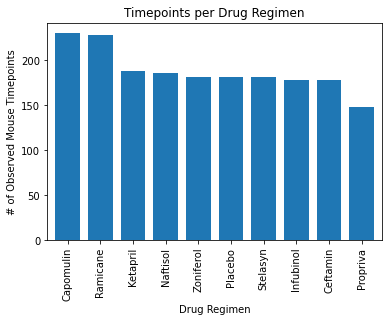

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pd_bar = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.75, color='tab:blue')
pd_bar.set_xlabel('Drug Regimen')
pd_bar.set_ylabel('# of Observed Mouse Timepoints')
pd_bar.set_title('Timepoints per Drug Regimen')

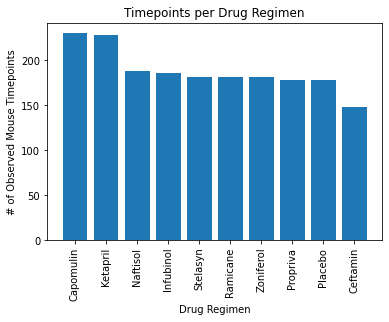

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice = clean_df['Drug Regimen'].value_counts()
drug = clean_df['Drug Regimen'].unique()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Timepoints per Drug Regimen")
plt.xticks(rotation='vertical')
plt.bar(drug, mice, color='tab:blue')
plt.show()

Text(0.5, 1.0, 'Gender of Mice Studied')

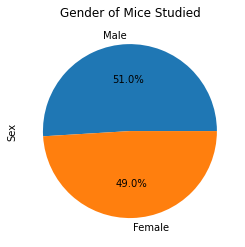

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df['Sex'].value_counts()
pd_pie = gender.plot.pie(autopct="%1.1f%%")
pd_pie.set_title("Gender of Mice Studied")

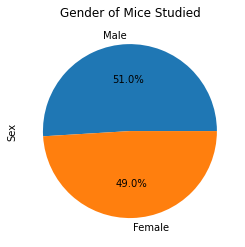

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, autopct="%1.1f%%", labels=["Male", "Female"])
plt.ylabel('Sex')
plt.title("Gender of Mice Studied")
plt.show()

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_sort = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
mouse_sort_df = pd.DataFrame(mouse_sort)

# Reset dataframe index
mouse_sort_reset = mouse_sort_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_merged = pd.merge(mouse_sort_reset, clean_df, on=('Mouse ID','Timepoint'), how='left')

In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes

    # Append tumor volumes to corresponding treatment list
for index, row in mouse_merged.iterrows():
    if row['Drug Regimen'] == treatments[0]:
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])

# Create a DataFrame to store tumor volumes by drug regimen
drug_data = pd.DataFrame({'Capomulin': tumor_cap, 'Ramicane': tumor_ram, 'Infubinol': tumor_inf, 'Ceftamin':tumor_cef})

# variables to simplify calculation
cap = drug_data['Capomulin']
ram = drug_data['Ramicane']
inf = drug_data['Infubinol']
cef = drug_data['Ceftamin']

# calculate quartiles and IQR for each regimen
cap_quar = cap.quantile([.25,.5,.75])
cap_lowerq = cap_quar[0.25]
cap_upperq = cap_quar[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

ram_quar = ram.quantile([.25,.5,.75])
ram_lowerq = ram_quar[0.25]
ram_upperq = ram_quar[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound =  ram_upperq + (1.5*ram_iqr)

inf_quar = inf.quantile([.25,.5,.75])
inf_lowerq = inf_quar[0.25]
inf_upperq = inf_quar[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

cef_quar = cef.quantile([.25,.5,.75])
cef_lowerq = cef_quar[0.25]
cef_upperq = cef_quar[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound =  cef_upperq + (1.5*cef_iqr)

# Determine outliers using upper and lower bounds
outliers_cap = cap[(cap < cap_lower_bound) | (cap > cap_upper_bound)]
outliers_ram = ram[(ram < ram_lower_bound) | (ram > ram_upper_bound)]
outliers_inf = inf[(inf < inf_lower_bound) | (inf > inf_upper_bound)]
outliers_cef = cef[(cef < cef_lower_bound) | (cef > cef_upper_bound)]

# Print outliers
print(f"Capomulin's potential outliers: {outliers_cap}")
print(f"Ramicane's potential outliers: {outliers_ram}")
print(f"Infubinol's potential outliers: {outliers_inf}")
print(f"Ceftamin's potential outliers: {outliers_cef}")

Capomulin's potential outliers: Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers: Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers: Series([], Name: Ceftamin, dtype: float64)


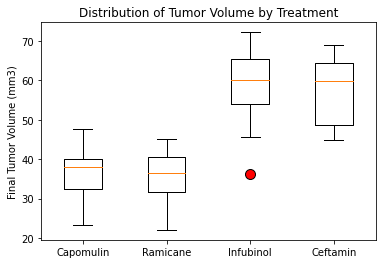

In [13]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
red_dot = dict(markerfacecolor = "red", markersize=10)
ax1.boxplot([cap, ram, inf, cef], labels=treatments, flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distribution of Tumor Volume by Treatment")
plt.show()

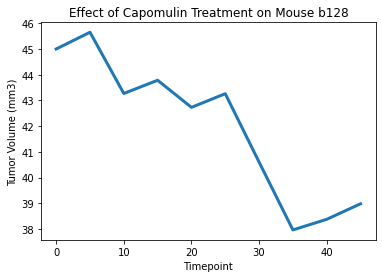

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Limit DataFrame to specific mouse
b128 = clean_df.loc[clean_df['Mouse ID'] == 'b128' ,:]

# Set axis as variables to simplify plotting
x_axis = b128['Timepoint']
y_axis = b128['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
plt.plot(x_axis, y_axis, linewidth=3)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Effect of Capomulin Treatment on Mouse b128')
plt.show()

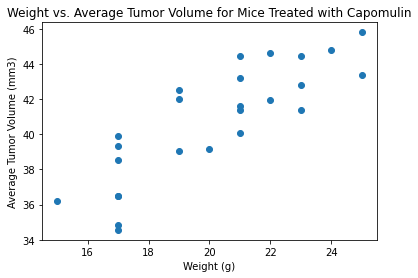

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Limit DataFrame to only Capomulin
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin' ,:]

# Calculate mean to simplify plot
avg_cap = capomulin.groupby(['Mouse ID']).mean()

plt.scatter(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Weight vs. Average Tumor Volume for Mice Treated with Capomulin")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84.


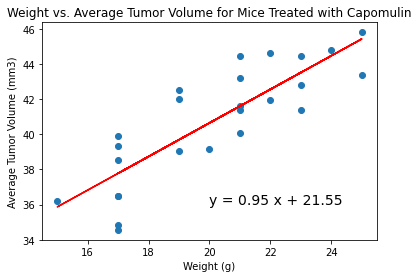

In [16]:
#Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Correlation
cap_cor = st.pearsonr(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(cap_cor[0],2)}.")

# Regression
c_slope, c_int, c_r, c_p, c_std_err = st.linregress(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])
c_fit = avg_cap['Weight (g)']* c_slope + c_int

# Line equation
line = f"y = {round(c_slope, 2)} x + {round(c_int, 2)}"

plt.scatter(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(avg_cap["Weight (g)"], c_fit, color='red')
plt.annotate(line,(20,36), fontsize=14)
plt.title("Weight vs. Average Tumor Volume for Mice Treated with Capomulin")
plt.show()